In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/Cricket-all-teams-all-matches.csv')
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,"Oct 14-17, 2005",Test # 1768,Test
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),"Oct 9, 2005",ODI # 2284,ODI
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),"Oct 7, 2005",ODI # 2283,ODI
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),"Oct 5, 2005",ODI # 2282,ODI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      7793 non-null   object
 1   Team 2      7793 non-null   object
 2   Winner      7793 non-null   object
 3   Margin      6755 non-null   object
 4   Ground      7793 non-null   object
 5   Match Date  7793 non-null   object
 6   Scorecard   7793 non-null   object
 7   Format      7793 non-null   object
dtypes: object(8)
memory usage: 487.2+ KB


In [5]:
df.Format.value_counts()

Format
ODI      4130
Test     2581
T20I     1082
Name: count, dtype: int64

In [6]:
df_na_margin = df[df.Margin.isna()]
df_na_margin

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
5,Pakistan,India,drawn,NaN,Lahore,"Jan 13-17, 2006",Test # 1781,Test
8,India,Pakistan,drawn,NaN,Mohali,"Mar 8-12, 2005",Test # 1738,Test
...,...,...,...,...,...,...,...,...
7725,Zimbabwe,West Indies,drawn,NaN,Bulawayo,"Oct 29-Nov 2, 2017",Test # 2280,Test
7730,Zimbabwe,West Indies,drawn,NaN,Harare,"Nov 4-8, 2003",Test # 1668,Test
7731,Zimbabwe,West Indies,drawn,NaN,Harare,"Jul 27-31, 2001",Test # 1553,Test
7738,Zimbabwe,West Indies,tied,NaN,Bulawayo,"Nov 19, 2016",ODI # 3806,ODI


In [7]:
df_na_margin.Winner.value_counts()

Winner
drawn        791
no result    183
tied          58
Pakistan       3
India          1
England        1
Sri Lanka      1
Name: count, dtype: int64

In [8]:
# detecting conceded matchesd
df_na_Pak = df_na_margin[df_na_margin["Winner"] == "Pakistan"]
df_na_Pak.Margin.fillna( "conceded", inplace=True)
df_na_Pak

C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\287840325.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_na_Pak.Margin.fillna( "conceded", inplace=True)
C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\287840325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_Pak.Margin.fillna( "conceded", inplace=True)


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
192,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
385,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
642,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [9]:
df_na_Ind = df_na_margin[df_na_margin["Winner"] == "India"]
df_na_Ind.Margin.fillna( "conceded", inplace=True)
df_na_Ind

C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\2309859105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_na_Ind.Margin.fillna( "conceded", inplace=True)
C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\2309859105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_Ind.Margin.fillna( "conceded", inplace=True)


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
174,India,Pakistan,India,conceded,Hyderabad (Deccan),"Mar 20, 1987",ODI # 436,ODI


In [10]:
df_na_Eng = df_na_margin[df_na_margin["Winner"] == "England"]
df_na_Eng.Margin.fillna( "conceded", inplace=True)
df_na_Eng

C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\970400816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_na_Eng.Margin.fillna( "conceded", inplace=True)
C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\970400816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_Eng.Margin.fillna( "conceded", inplace=True)


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
532,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test


In [11]:
df_na_Sl = df_na_margin[df_na_margin["Winner"] == "Sri Lanka"]
df_na_Sl.Margin.fillna( "conceded", inplace=True)
df_na_Sl

C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\1001461546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_na_Sl.Margin.fillna( "conceded", inplace=True)
C:\Users\ratul\AppData\Local\Temp\ipykernel_14764\1001461546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_Sl.Margin.fillna( "conceded", inplace=True)


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
2896,India,Sri Lanka,Sri Lanka,conceded,Eden Gardens,"Mar 13, 1996",ODI # 1081,ODI


In [12]:
df1 = df.copy()
df1 = pd.concat([df1, df_na_Sl], ignore_index=True)
df1.drop(df_na_Sl.index, inplace=True)

In [13]:
df1 = pd.concat([df1, df_na_Eng], ignore_index=True)
df1.drop(df_na_Eng.index, inplace=True)
df1 = pd.concat([df1, df_na_Pak], ignore_index=True)
df1.drop(df_na_Pak.index, inplace=True)
df1 = pd.concat([df1, df_na_Ind], ignore_index=True)
df1.drop(df_na_Ind.index, inplace=True)
df1

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [14]:
df1[df1.Margin == "conceded"]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
7788,India,Sri Lanka,Sri Lanka,conceded,Eden Gardens,"Mar 13, 1996",ODI # 1081,ODI
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI
7793,India,Pakistan,India,conceded,Hyderabad (Deccan),"Mar 20, 1987",ODI # 436,ODI


In [15]:
df1.Margin.value_counts()

Margin
7 wickets          543
6 wickets          502
8 wickets          444
5 wickets          424
4 wickets          324
                  ... 
inns & 104 runs      1
341 runs             1
340 runs             1
inns & 26 runs       1
inns & 105 runs      1
Name: count, Length: 557, dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7793 entries, 0 to 7793
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      7793 non-null   object
 1   Team 2      7793 non-null   object
 2   Winner      7793 non-null   object
 3   Margin      6760 non-null   object
 4   Ground      7793 non-null   object
 5   Match Date  7793 non-null   object
 6   Scorecard   7793 non-null   object
 7   Format      7793 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


In [17]:
7793 - 6760

1033

In [18]:
df_na_margin_new = df1[df1.Margin.isna()]
df_na_margin_new[df_na_margin_new["Winner"] == "Pakistan"]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
639,England,Pakistan,Pakistan,NaN,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [19]:
df1[638:640]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
639,England,Pakistan,Pakistan,NaN,Leeds,"Jun 17, 2001",ODI # 1724,ODI
640,England,Pakistan,Pakistan,108 runs,Birmingham,"Jun 7, 2001",ODI # 1719,ODI


In [20]:
df1.drop(df1.index[639], inplace=True)
df1

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [21]:
df1.Winner.value_counts()

Winner
Australia       1121
England          888
India            881
drawn            791
Pakistan         776
South Africa     683
West Indies      674
New Zealand      597
Sri Lanka        595
Bangladesh       220
no result        183
Zimbabwe         150
Afghanistan      114
Ireland           60
tied              58
World-XI           1
Name: count, dtype: int64

In [22]:
df2 = df1.copy()
df2[df2.Margin.isna() & (df2.Winner == "Pakistan")]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
639,England,Pakistan,Pakistan,NaN,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [23]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [24]:
df2[df2.index == 639]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
639,England,Pakistan,Pakistan,NaN,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [25]:
df2.drop(index = 639, inplace=True)
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [26]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [27]:
df2.Winner.value_counts()

Winner
Australia       1121
England          888
India            881
drawn            791
Pakistan         775
South Africa     683
West Indies      674
New Zealand      597
Sri Lanka        595
Bangladesh       220
no result        183
Zimbabwe         150
Afghanistan      114
Ireland           60
tied              58
World-XI           1
Name: count, dtype: int64

In [28]:
df3 = df2.copy()
df3

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [29]:
df2_margin_na = df2[df2.Margin.isna()]
df2_margin_na

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
5,Pakistan,India,drawn,NaN,Lahore,"Jan 13-17, 2006",Test # 1781,Test
8,India,Pakistan,drawn,NaN,Mohali,"Mar 8-12, 2005",Test # 1738,Test
...,...,...,...,...,...,...,...,...
7720,Zimbabwe,West Indies,drawn,NaN,Bulawayo,"Oct 29-Nov 2, 2017",Test # 2280,Test
7725,Zimbabwe,West Indies,drawn,NaN,Harare,"Nov 4-8, 2003",Test # 1668,Test
7726,Zimbabwe,West Indies,drawn,NaN,Harare,"Jul 27-31, 2001",Test # 1553,Test
7733,Zimbabwe,West Indies,tied,NaN,Bulawayo,"Nov 19, 2016",ODI # 3806,ODI


In [30]:
df2.Winner.value_counts()

Winner
Australia       1121
England          888
India            881
drawn            791
Pakistan         775
South Africa     683
West Indies      674
New Zealand      597
Sri Lanka        595
Bangladesh       220
no result        183
Zimbabwe         150
Afghanistan      114
Ireland           60
tied              58
World-XI           1
Name: count, dtype: int64

In [31]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [32]:
df2['Winner'] = df2['Winner'].str.strip()

# Fill Margin where Winner indicates special outcomes
df2.loc[df2['Margin'].isna() & (df2['Winner'] == 'drawn'), 'Margin'] = 'drawn'
df2.loc[df2['Margin'].isna() & (df2['Winner'] == 'tied'), 'Margin'] = 'tied'
df2.loc[df2['Margin'].isna() & (df2['Winner'] == 'no result'), 'Margin'] = 'no result'

In [33]:
df2.Margin.isna().sum()

np.int64(0)

In [34]:
df2[df2["Margin"] == "conceded"][["Winner", "Margin"]]

,Winner,Margin
7788,Sri Lanka,conceded
7789,England,conceded
7790,Pakistan,conceded
7791,Pakistan,conceded
7792,Pakistan,conceded
7793,India,conceded


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7791 entries, 0 to 7793
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      7791 non-null   object
 1   Team 2      7791 non-null   object
 2   Winner      7791 non-null   object
 3   Margin      7791 non-null   object
 4   Ground      7791 non-null   object
 5   Match Date  7791 non-null   object
 6   Scorecard   7791 non-null   object
 7   Format      7791 non-null   object
dtypes: object(8)
memory usage: 547.8+ KB


Now Here are no na values

In [36]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,drawn,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,drawn,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,drawn,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI


In [37]:
df2["year"] = df2["Match Date"].apply(lambda x: x.split(",")[1].strip())
df2["year"]

0       2007
1       2007
2       2007
3       2006
4       2006
        ... 
7789    2006
7790    1978
7791    1988
7792    2001
7793    1987
Name: year, Length: 7791, dtype: object

In [38]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,year
0,India,Pakistan,drawn,drawn,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test,2007
1,India,Pakistan,drawn,drawn,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test,2007
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006
4,Pakistan,India,drawn,drawn,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test,2006
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test,2006
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI,1978
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI,1988
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI,2001


In [39]:
df2[df2["year"] == "2025"]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,year
59,India,Pakistan,India,6 wickets,Dubai (DICS),"Feb 23, 2025",ODI # 4847,ODI,2025
796,New Zealand,Pakistan,New Zealand,43 runs,Mount Maunganui,"Apr 5, 2025",ODI # 4863,ODI,2025
797,New Zealand,Pakistan,New Zealand,84 runs,Hamilton,"Apr 2, 2025",ODI # 4862,ODI,2025
798,New Zealand,Pakistan,New Zealand,73 runs,Napier,"Mar 29, 2025",ODI # 4861,ODI,2025
799,Pakistan,New Zealand,New Zealand,60 runs,Karachi,"Feb 19, 2025",ODI # 4843,ODI,2025
800,Pakistan,New Zealand,New Zealand,5 wickets,Karachi,"Feb 14, 2025",ODI # 4838,ODI,2025
801,Pakistan,New Zealand,New Zealand,78 runs,Lahore,"Feb 8, 2025",ODI # 4827,ODI,2025
918,New Zealand,Pakistan,New Zealand,8 wickets,Wellington,"Mar 26, 2025",T20I # 3128,T20I,2025
919,New Zealand,Pakistan,New Zealand,115 runs,Mount Maunganui,"Mar 23, 2025",T20I # 3126,T20I,2025
920,New Zealand,Pakistan,Pakistan,9 wickets,Auckland,"Mar 21, 2025",T20I # 3124,T20I,2025


In [40]:
df2["month"] = df2["Match Date"].apply(lambda x: x.split(",")[0].strip())
df2["month"]

0           Dec 8-12
1       Nov 30-Dec 4
2          Nov 22-26
3       Jan 29-Feb 1
4          Jan 21-25
            ...     
7789       Aug 17-21
7790           Nov 3
7791          Oct 14
7792          Jun 17
7793          Mar 20
Name: month, Length: 7791, dtype: object

In [41]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,year,month
0,India,Pakistan,drawn,drawn,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test,2007,Dec 8-12
1,India,Pakistan,drawn,drawn,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test,2007,Nov 30-Dec 4
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007,Nov 22-26
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006,Jan 29-Feb 1
4,Pakistan,India,drawn,drawn,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test,2006,Jan 21-25
...,...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,"Aug 17-21, 2006",Test # 1814,Test,2006,Aug 17-21
7790,Pakistan,India,Pakistan,conceded,Sahiwal,"Nov 3, 1978",ODI # 56,ODI,1978,Nov 3
7791,Pakistan,Australia,Pakistan,conceded,Lahore,"Oct 14, 1988",ODI # 522,ODI,1988,Oct 14
7792,England,Pakistan,Pakistan,conceded,Leeds,"Jun 17, 2001",ODI # 1724,ODI,2001,Jun 17


In [42]:
df2 = df2.drop(columns=["Match Date"], axis=1)
df2

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,year,month
0,India,Pakistan,drawn,drawn,Bengaluru,Test # 1852,Test,2007,Dec 8-12
1,India,Pakistan,drawn,drawn,Eden Gardens,Test # 1850,Test,2007,Nov 30-Dec 4
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007,Nov 22-26
3,Pakistan,India,Pakistan,341 runs,Karachi,Test # 1783,Test,2006,Jan 29-Feb 1
4,Pakistan,India,drawn,drawn,Faisalabad,Test # 1782,Test,2006,Jan 21-25
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test # 1814,Test,2006,Aug 17-21
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI # 56,ODI,1978,Nov 3
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI # 522,ODI,1988,Oct 14
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI # 1724,ODI,2001,Jun 17


In [43]:
df2["Match no"] = df2["Scorecard"].apply(lambda x: x.split("#")[1].strip())
df2

,Team 1,Team 2,Winner,Margin,Ground,Scorecard,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test # 1852,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test # 1850,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test # 1849,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test # 1783,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test # 1782,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test # 1814,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI # 56,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI # 522,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI # 1724,ODI,2001,Jun 17,1724


In [44]:
df2 = df2.drop(columns = ["Scorecard"], axis=1)
df2

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001,Jun 17,1724


In [45]:
df2.Ground.value_counts()

Ground
Sydney            296
Melbourne         287
Sharjah           263
Harare            250
Lord's            223
                 ... 
Aberdeen            1
Berri               1
Nairobi (Club)      1
Patna               1
New Plymouth        1
Name: count, Length: 179, dtype: int64

In [46]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001,Jun 17,1724


In [47]:
df2.Format.value_counts()

Format
ODI      4128
Test     2581
T20I     1082
Name: count, dtype: int64

In [48]:
df2["Format"] = df2["Format"].str.strip()

In [49]:
df_odi = df2[df2["Format"] == "ODI"]
df_odi

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
59,India,Pakistan,India,6 wickets,Dubai (DICS),ODI,2025,Feb 23,4847
60,India,Pakistan,India,7 wickets,Ahmedabad,ODI,2023,Oct 14,4669
61,India,Pakistan,India,228 runs,Colombo (RPS),ODI,2023,Sep 10-11,4639
62,India,Pakistan,no result,no result,Pallekele,ODI,2023,Sep 2,4630
63,India,Pakistan,India,89 runs,Manchester,ODI,2019,Jun 16,4161
...,...,...,...,...,...,...,...,...,...
7788,India,Sri Lanka,Sri Lanka,conceded,Eden Gardens,ODI,1996,Mar 13,1081
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001,Jun 17,1724


In [50]:
df_test = df2[df2["Format"] == "Test"]
df_test

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7727,Zimbabwe,West Indies,West Indies,inns & 176 runs,Bulawayo,Test,2001,Jul 19-22,1551
7728,West Indies,Zimbabwe,West Indies,10 wickets,Kingston,Test,2000,Mar 24-28,1492
7729,West Indies,Zimbabwe,West Indies,35 runs,Port of Spain,Test,2000,Mar 16-20,1490
7783,Australia,ICC World XI,Australia,210 runs,Sydney,Test,2005,Oct 14-17,1768


In [51]:
df_t20 = df2[df2["Format"] == "T20I"]
df_t20

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
194,India,Pakistan,India,6 runs,New York,T20I,2024,Jun 9,2658
195,India,Pakistan,India,4 wickets,Melbourne,T20I,2022,Oct 23,1842
196,India,Pakistan,Pakistan,5 wickets,Dubai (DICS),T20I,2022,Sep 4,1758
197,India,Pakistan,India,5 wickets,Dubai (DICS),T20I,2022,Aug 28,1750
198,India,Pakistan,Pakistan,10 wickets,Dubai (DICS),T20I,2021,Oct 24,1361
...,...,...,...,...,...,...,...,...,...
7779,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,2022,Oct 19,1834
7780,West Indies,Zimbabwe,West Indies,41 runs,North Sound,T20I,2013,Mar 3,308
7781,West Indies,Zimbabwe,West Indies,8 wickets,North Sound,T20I,2013,Mar 2,305
7782,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,2010,Feb 28,150


In [52]:
df_odi.Ground.value_counts()

Ground
Sharjah           233
Sydney            161
Harare            159
Melbourne         151
Colombo (RPS)     149
                 ... 
Aberdeen            1
Nairobi (Club)      1
Berri               1
Patna               1
New Plymouth        1
Name: count, Length: 166, dtype: int64

<Axes: title={'center': 'Matches won by each team per year'}, xlabel='Winner'>

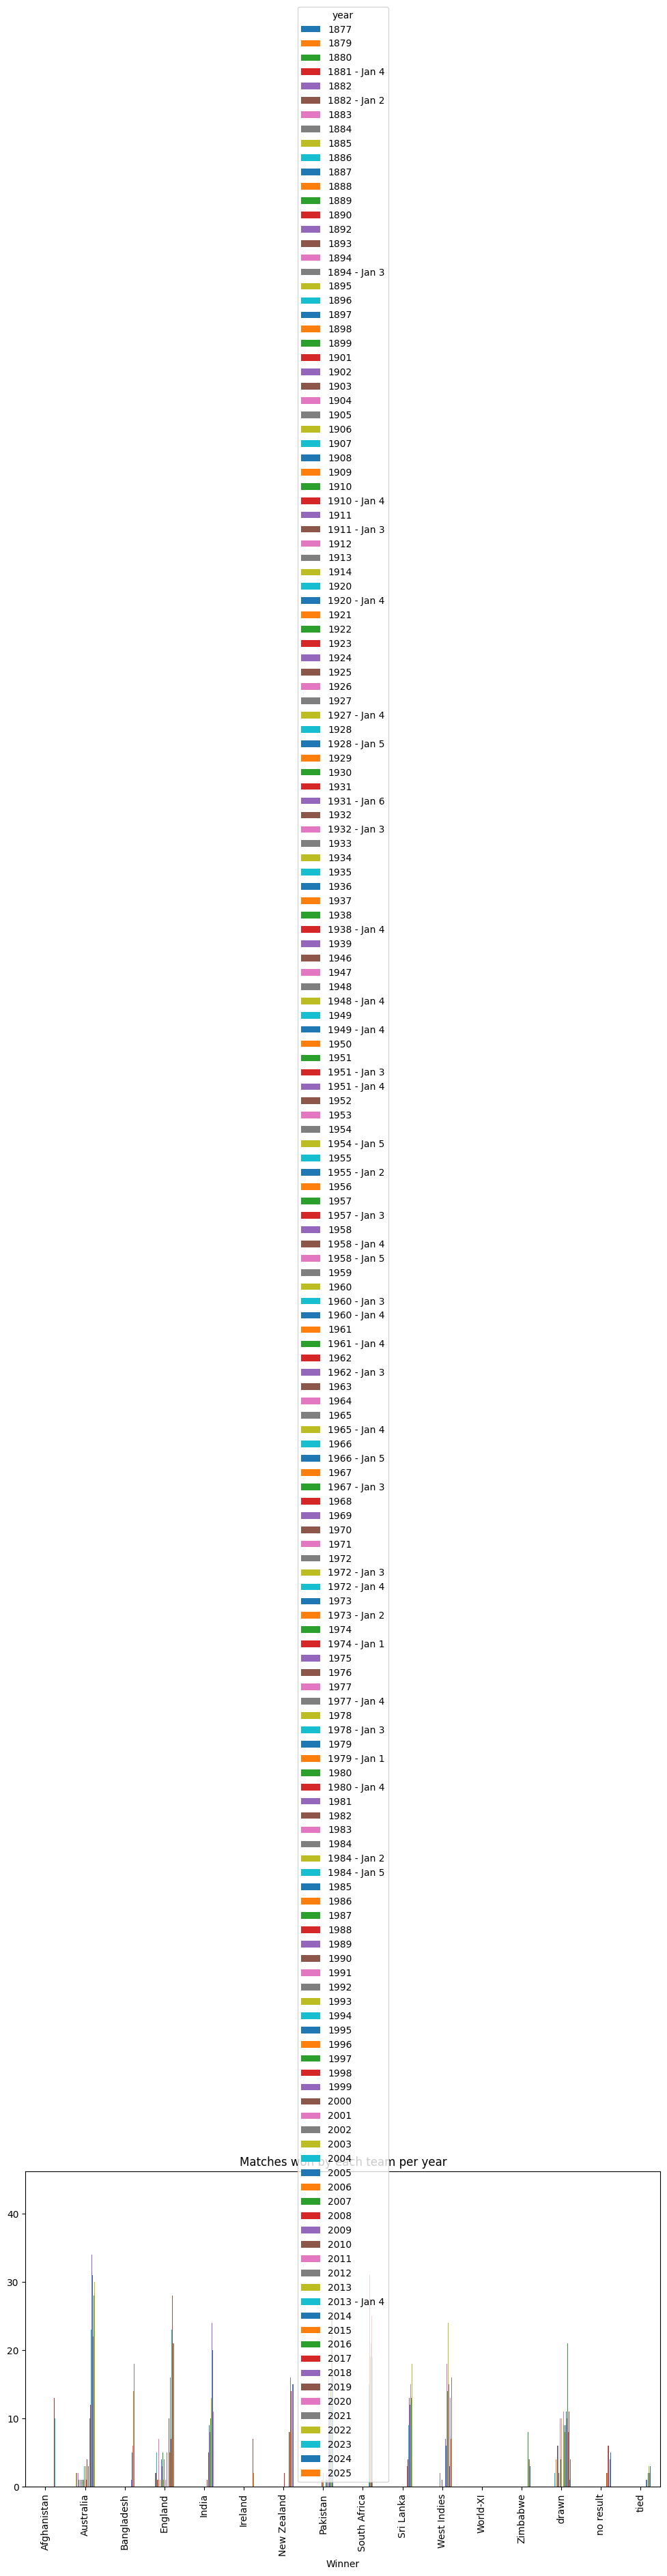

In [53]:
pd.crosstab(df2["Winner"], df2["year"]).plot(kind="bar", figsize=(12, 6), title="Matches won by each team per year")

<Axes: xlabel='Winner', ylabel='Count'>

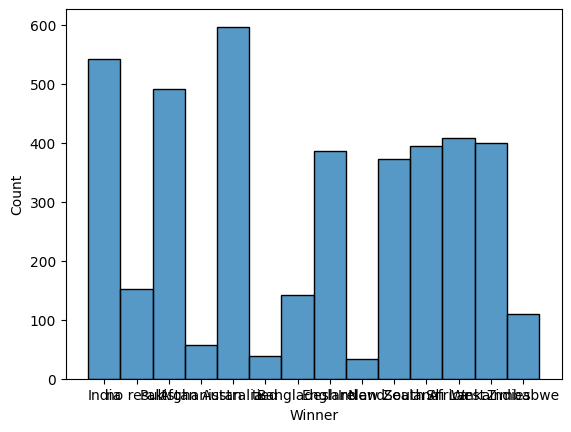

In [54]:
import seaborn as sns
sns.histplot(df_odi["Winner"], bins=20) 

<Axes: title={'center': 'Matches won by each team per format'}, xlabel='Winner'>

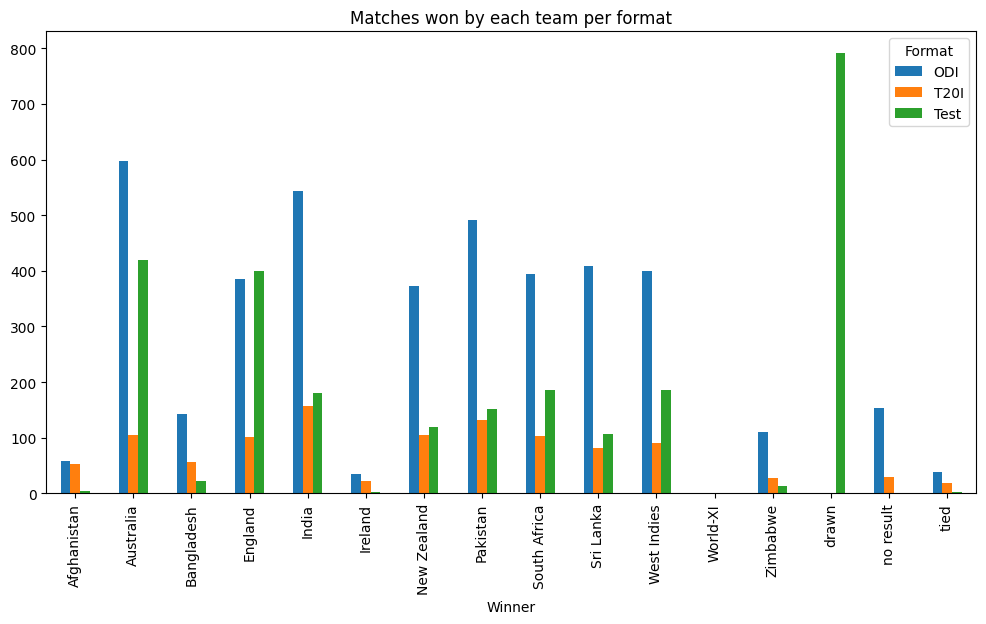

In [55]:
pd.crosstab(df2["Winner"], df2["Format"]).plot(kind="bar", figsize=(12, 6), title="Matches won by each team per format")

In [56]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001,Jun 17,1724


In [57]:
objects = df2.select_dtypes(include=['object']).columns
objects

Index(['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Format', 'year',
       'month', 'Match no'],
      dtype='object')

Here we are giving a try on machine learning model. We have df2 dataframe intact which is ready with no na values and having 9 object columns. Here we worked on a copy of df2 which is df4.

In [58]:
df4 = df2.copy()
x = df4.drop(columns=["Winner", "Margin"], axis=1)
y = df4[["Winner", "Margin"]]

In [59]:
dummies_x = pd.get_dummies(x, drop_first=True)
dummies_x

,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_ICC World XI,Team 1_India,Team 1_Ireland,Team 1_New Zealand,Team 1_Pakistan,Team 1_South Africa,Team 1_Sri Lanka,...,Match no_990,Match no_991,Match no_992,Match no_993,Match no_994,Match no_995,Match no_996,Match no_997,Match no_998,Match no_999
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
dummies_y = pd.get_dummies(y, drop_first=True)
dummies_y

,Winner_Australia,Winner_Bangladesh,Winner_England,Winner_India,Winner_Ireland,Winner_New Zealand,Winner_Pakistan,Winner_South Africa,Winner_Sri Lanka,Winner_West Indies,...,Margin_inns & 92 runs,Margin_inns & 93 runs,Margin_inns & 94 runs,Margin_inns & 95 runs,Margin_inns & 96 runs,Margin_inns & 97 runs,Margin_inns & 98 runs,Margin_inns & 99 runs,Margin_no result,Margin_tied
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
x

,Team 1,Team 2,Ground,Format,year,month,Match no
0,India,Pakistan,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...
7789,England,Pakistan,The Oval,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Leeds,ODI,2001,Jun 17,1724


In [62]:
x = pd.concat([x, dummies_x], axis=1)
x

,Team 1,Team 2,Ground,Format,year,month,Match no,Team 1_Australia,Team 1_Bangladesh,Team 1_England,...,Match no_990,Match no_991,Match no_992,Match no_993,Match no_994,Match no_995,Match no_996,Match no_997,Match no_998,Match no_999
0,India,Pakistan,Bengaluru,Test,2007,Dec 8-12,1852,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,India,Pakistan,Eden Gardens,Test,2007,Nov 30-Dec 4,1850,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,India,Pakistan,Delhi,Test,2007,Nov 22-26,1849,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Pakistan,India,Karachi,Test,2006,Jan 29-Feb 1,1783,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Pakistan,India,Faisalabad,Test,2006,Jan 21-25,1782,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,The Oval,Test,2006,Aug 17-21,1814,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7790,Pakistan,India,Sahiwal,ODI,1978,Nov 3,56,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,Pakistan,Australia,Lahore,ODI,1988,Oct 14,522,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,England,Pakistan,Leeds,ODI,2001,Jun 17,1724,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [63]:
x_objects = x.select_dtypes(include=['object']).columns
x_objects

Index(['Team 1', 'Team 2', 'Ground', 'Format', 'year', 'month', 'Match no'], dtype='object')

In [64]:
x = x.drop(columns=x_objects, axis=1)
x

,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_ICC World XI,Team 1_India,Team 1_Ireland,Team 1_New Zealand,Team 1_Pakistan,Team 1_South Africa,Team 1_Sri Lanka,...,Match no_990,Match no_991,Match no_992,Match no_993,Match no_994,Match no_995,Match no_996,Match no_997,Match no_998,Match no_999
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
y = pd.concat([y, dummies_y], axis=1)
y

,Winner,Margin,Winner_Australia,Winner_Bangladesh,Winner_England,Winner_India,Winner_Ireland,Winner_New Zealand,Winner_Pakistan,Winner_South Africa,...,Margin_inns & 92 runs,Margin_inns & 93 runs,Margin_inns & 94 runs,Margin_inns & 95 runs,Margin_inns & 96 runs,Margin_inns & 97 runs,Margin_inns & 98 runs,Margin_inns & 99 runs,Margin_no result,Margin_tied
0,drawn,drawn,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,drawn,drawn,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,India,6 wickets,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Pakistan,341 runs,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,drawn,drawn,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,England,conceded,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,Pakistan,conceded,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7791,Pakistan,conceded,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7792,Pakistan,conceded,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
y_objects = y.select_dtypes(include=['object']).columns
y_objects

Index(['Winner', 'Margin'], dtype='object')

In [67]:
y = y.drop(columns=y_objects, axis=1)
y

,Winner_Australia,Winner_Bangladesh,Winner_England,Winner_India,Winner_Ireland,Winner_New Zealand,Winner_Pakistan,Winner_South Africa,Winner_Sri Lanka,Winner_West Indies,...,Margin_inns & 92 runs,Margin_inns & 93 runs,Margin_inns & 94 runs,Margin_inns & 95 runs,Margin_inns & 96 runs,Margin_inns & 97 runs,Margin_inns & 98 runs,Margin_inns & 99 runs,Margin_no result,Margin_tied
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df2

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001,Jun 17,1724


In [69]:
df5 = df2.copy()
df5
x = df5.drop(columns=["Winner", "Margin"], axis=1)
y = df5[["Winner"]]
dummies_x = pd.get_dummies(x, drop_first=True)
dummies_y = pd.get_dummies(y, drop_first=True)
x = pd.concat([x, dummies_x], axis=1)
x_objects = x.select_dtypes(include=['object']).columns
x = x.drop(columns=x_objects, axis=1)
y = pd.concat([y, dummies_y], axis=1)
y_objects = y.select_dtypes(include=['object']).columns
y = y.drop(columns=y_objects, axis=1)

In [70]:
x

,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_ICC World XI,Team 1_India,Team 1_Ireland,Team 1_New Zealand,Team 1_Pakistan,Team 1_South Africa,Team 1_Sri Lanka,...,Match no_990,Match no_991,Match no_992,Match no_993,Match no_994,Match no_995,Match no_996,Match no_997,Match no_998,Match no_999
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
y

,Winner_Australia,Winner_Bangladesh,Winner_England,Winner_India,Winner_Ireland,Winner_New Zealand,Winner_Pakistan,Winner_South Africa,Winner_Sri Lanka,Winner_West Indies,Winner_World-XI,Winner_Zimbabwe,Winner_drawn,Winner_no result,Winner_tied
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7792,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [72]:
x

,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_ICC World XI,Team 1_India,Team 1_Ireland,Team 1_New Zealand,Team 1_Pakistan,Team 1_South Africa,Team 1_Sri Lanka,...,Match no_990,Match no_991,Match no_992,Match no_993,Match no_994,Match no_995,Match no_996,Match no_997,Match no_998,Match no_999
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7792,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
y

,Winner_Australia,Winner_Bangladesh,Winner_England,Winner_India,Winner_Ireland,Winner_New Zealand,Winner_Pakistan,Winner_South Africa,Winner_Sri Lanka,Winner_West Indies,Winner_World-XI,Winner_Zimbabwe,Winner_drawn,Winner_no result,Winner_tied
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
7790,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7791,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7792,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [74]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001,Jun 17,1724


In [75]:
df5.year.dtypes

dtype('O')

In [76]:
# string to float
df5["year"] = df5["year"].apply(lambda x: float(x) if len(x.split(" ")) < 2 else x)
df5.year.dtypes

dtype('O')

In [77]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [78]:
df_test = df5[10:20]
df_test

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,2004.0,Apr 5-8,1695
11,Pakistan,India,India,inns & 52 runs,Multan,Test,2004.0,Mar 28-Apr 1,1693
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1999.0,Feb 16-20,1444
13,India,Pakistan,India,212 runs,Delhi,Test,1999.0,Feb 4-7,1443
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1999.0,Jan 28-31,1442
15,Pakistan,India,drawn,drawn,Sialkot,Test,1989.0,Dec 9-14,1132
16,Pakistan,India,drawn,drawn,Lahore,Test,1989.0,Dec 1-6,1130
17,Pakistan,India,drawn,drawn,Faisalabad,Test,1989.0,Nov 23-28,1128
18,Pakistan,India,drawn,drawn,Karachi,Test,1989.0,Nov 15-20,1127
19,India,Pakistan,Pakistan,16 runs,Bengaluru,Test,1987.0,Mar 13-17,1073


In [79]:
df_test["Match no"].dtypes

dtype('O')

In [80]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [81]:
df8 = df5.copy()
df5["year"] = pd.to_numeric(df5["year"], errors='coerce')
df5.year.dtypes

dtype('float64')

In [82]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [83]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7791 entries, 0 to 7793
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team 1    7791 non-null   object 
 1   Team 2    7791 non-null   object 
 2   Winner    7791 non-null   object 
 3   Margin    7791 non-null   object 
 4   Ground    7791 non-null   object 
 5   Format    7791 non-null   object 
 6   year      7751 non-null   float64
 7   month     7791 non-null   object 
 8   Match no  7791 non-null   object 
dtypes: float64(1), object(8)
memory usage: 608.7+ KB


In [84]:
df5.year.isna().sum()

np.int64(40)

In [85]:
df6 = df5[df5.year.isna()]
df6

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
46,India,Pakistan,drawn,drawn,Eden Gardens,Test,NaN,Dec 30,501
286,Australia,Pakistan,Australia,92 runs,Melbourne,Test,NaN,Dec 29,705
1123,Pakistan,Sri Lanka,drawn,drawn,Abu Dhabi,Test,NaN,Dec 31,2112
1384,Pakistan,West Indies,drawn,drawn,Multan,Test,NaN,Dec 30,892
1764,Australia,India,India,222 runs,Melbourne,Test,NaN,Dec 30,812
1774,Australia,India,Australia,inns & 4 runs,Melbourne,Test,NaN,Dec 30,625
2116,India,England,drawn,drawn,Eden Gardens,Test,NaN,Dec 31,1007
2144,India,England,India,28 runs,Eden Gardens,Test,NaN,Dec 30,706
2158,India,England,India,187 runs,Eden Gardens,Test,NaN,Dec 30,518
2173,India,England,drawn,drawn,Eden Gardens,Test,NaN,Dec 30,344


In [86]:
index = df6.index
index

Index([  46,  286, 1123, 1384, 1764, 1774, 2116, 2144, 2158, 2173, 2397, 3023,
       3032, 3041, 3050, 3060, 3708, 3746, 3756, 3766, 3775, 3815, 3824, 3845,
       3853, 3901, 3931, 3936, 4196, 4414, 4424, 4434, 4443, 4455, 4819, 4833,
       4864, 4872, 5951, 5971],
      dtype='int64')

In [87]:
df7 = df8.loc[index]

In [88]:
df7

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
46,India,Pakistan,drawn,drawn,Eden Gardens,Test,1960 - Jan 4,Dec 30,501
286,Australia,Pakistan,Australia,92 runs,Melbourne,Test,1972 - Jan 3,Dec 29,705
1123,Pakistan,Sri Lanka,drawn,drawn,Abu Dhabi,Test,2013 - Jan 4,Dec 31,2112
1384,Pakistan,West Indies,drawn,drawn,Multan,Test,1980 - Jan 4,Dec 30,892
1764,Australia,India,India,222 runs,Melbourne,Test,1977 - Jan 4,Dec 30,812
1774,Australia,India,Australia,inns & 4 runs,Melbourne,Test,1967 - Jan 3,Dec 30,625
2116,India,England,drawn,drawn,Eden Gardens,Test,1984 - Jan 5,Dec 31,1007
2144,India,England,India,28 runs,Eden Gardens,Test,1972 - Jan 4,Dec 30,706
2158,India,England,India,187 runs,Eden Gardens,Test,1961 - Jan 4,Dec 30,518
2173,India,England,drawn,drawn,Eden Gardens,Test,1951 - Jan 4,Dec 30,344


In [89]:
df7["year"] = df7["year"].apply(lambda x: x.split(" ")[0])
df7

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
46,India,Pakistan,drawn,drawn,Eden Gardens,Test,1960,Dec 30,501
286,Australia,Pakistan,Australia,92 runs,Melbourne,Test,1972,Dec 29,705
1123,Pakistan,Sri Lanka,drawn,drawn,Abu Dhabi,Test,2013,Dec 31,2112
1384,Pakistan,West Indies,drawn,drawn,Multan,Test,1980,Dec 30,892
1764,Australia,India,India,222 runs,Melbourne,Test,1977,Dec 30,812
1774,Australia,India,Australia,inns & 4 runs,Melbourne,Test,1967,Dec 30,625
2116,India,England,drawn,drawn,Eden Gardens,Test,1984,Dec 31,1007
2144,India,England,India,28 runs,Eden Gardens,Test,1972,Dec 30,706
2158,India,England,India,187 runs,Eden Gardens,Test,1961,Dec 30,518
2173,India,England,drawn,drawn,Eden Gardens,Test,1951,Dec 30,344


In [90]:
index

Index([  46,  286, 1123, 1384, 1764, 1774, 2116, 2144, 2158, 2173, 2397, 3023,
       3032, 3041, 3050, 3060, 3708, 3746, 3756, 3766, 3775, 3815, 3824, 3845,
       3853, 3901, 3931, 3936, 4196, 4414, 4424, 4434, 4443, 4455, 4819, 4833,
       4864, 4872, 5951, 5971],
      dtype='int64')

In [91]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [92]:
df5[df5.year.isna()]

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
46,India,Pakistan,drawn,drawn,Eden Gardens,Test,NaN,Dec 30,501
286,Australia,Pakistan,Australia,92 runs,Melbourne,Test,NaN,Dec 29,705
1123,Pakistan,Sri Lanka,drawn,drawn,Abu Dhabi,Test,NaN,Dec 31,2112
1384,Pakistan,West Indies,drawn,drawn,Multan,Test,NaN,Dec 30,892
1764,Australia,India,India,222 runs,Melbourne,Test,NaN,Dec 30,812
1774,Australia,India,Australia,inns & 4 runs,Melbourne,Test,NaN,Dec 30,625
2116,India,England,drawn,drawn,Eden Gardens,Test,NaN,Dec 31,1007
2144,India,England,India,28 runs,Eden Gardens,Test,NaN,Dec 30,706
2158,India,England,India,187 runs,Eden Gardens,Test,NaN,Dec 30,518
2173,India,England,drawn,drawn,Eden Gardens,Test,NaN,Dec 30,344


In [93]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [94]:
df5.drop(index=index, inplace=True)
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [95]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7789,England,Pakistan,England,conceded,The Oval,Test,2006.0,Aug 17-21,1814
7790,Pakistan,India,Pakistan,conceded,Sahiwal,ODI,1978.0,Nov 3,56
7791,Pakistan,Australia,Pakistan,conceded,Lahore,ODI,1988.0,Oct 14,522
7792,England,Pakistan,Pakistan,conceded,Leeds,ODI,2001.0,Jun 17,1724


In [96]:
df7

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
46,India,Pakistan,drawn,drawn,Eden Gardens,Test,1960,Dec 30,501
286,Australia,Pakistan,Australia,92 runs,Melbourne,Test,1972,Dec 29,705
1123,Pakistan,Sri Lanka,drawn,drawn,Abu Dhabi,Test,2013,Dec 31,2112
1384,Pakistan,West Indies,drawn,drawn,Multan,Test,1980,Dec 30,892
1764,Australia,India,India,222 runs,Melbourne,Test,1977,Dec 30,812
1774,Australia,India,Australia,inns & 4 runs,Melbourne,Test,1967,Dec 30,625
2116,India,England,drawn,drawn,Eden Gardens,Test,1984,Dec 31,1007
2144,India,England,India,28 runs,Eden Gardens,Test,1972,Dec 30,706
2158,India,England,India,187 runs,Eden Gardens,Test,1961,Dec 30,518
2173,India,England,drawn,drawn,Eden Gardens,Test,1951,Dec 30,344


In [97]:
df5 = pd.concat([df5, df7], ignore_index=True)
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7786,Australia,West Indies,West Indies,10 wickets,Melbourne,Test,1979,Dec 29,867
7787,Australia,West Indies,Australia,7 wickets,Melbourne,Test,1960,Dec 30,500
7788,Australia,West Indies,Australia,1 wicket,Melbourne,Test,1951,Dec 31,345
7789,South Africa,England,drawn,drawn,Cape Town,Test,1938,Dec 31,268


In [98]:
df5.isna().sum()

Team 1      0
Team 2      0
Winner      0
Margin      0
Ground      0
Format      0
year        0
month       0
Match no    0
dtype: int64

In [99]:
df5.year.dtypes

dtype('O')

In [100]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team 1    7791 non-null   object
 1   Team 2    7791 non-null   object
 2   Winner    7791 non-null   object
 3   Margin    7791 non-null   object
 4   Ground    7791 non-null   object
 5   Format    7791 non-null   object
 6   year      7791 non-null   object
 7   month     7791 non-null   object
 8   Match no  7791 non-null   object
dtypes: object(9)
memory usage: 547.9+ KB


In [101]:
df5['year'] = pd.to_numeric(df5['year'], errors='coerce')
df5.year.isna().sum()

np.int64(0)

In [102]:
df5["year"].dtypes

dtype('float64')

In [103]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team 1    7791 non-null   object 
 1   Team 2    7791 non-null   object 
 2   Winner    7791 non-null   object 
 3   Margin    7791 non-null   object 
 4   Ground    7791 non-null   object 
 5   Format    7791 non-null   object 
 6   year      7791 non-null   float64
 7   month     7791 non-null   object 
 8   Match no  7791 non-null   object 
dtypes: float64(1), object(8)
memory usage: 547.9+ KB


In [104]:
df5["Match no"].dtypes

dtype('O')

In [105]:
df5["Match no"] = pd.to_numeric(df5["Match no"], errors='coerce')
df5["Match no"].isna().sum()

np.int64(0)

In [106]:
df5["Match no"].dtypes

dtype('int64')

In [107]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team 1    7791 non-null   object 
 1   Team 2    7791 non-null   object 
 2   Winner    7791 non-null   object 
 3   Margin    7791 non-null   object 
 4   Ground    7791 non-null   object 
 5   Format    7791 non-null   object 
 6   year      7791 non-null   float64
 7   month     7791 non-null   object 
 8   Match no  7791 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 547.9+ KB


In [108]:
df5

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7786,Australia,West Indies,West Indies,10 wickets,Melbourne,Test,1979.0,Dec 29,867
7787,Australia,West Indies,Australia,7 wickets,Melbourne,Test,1960.0,Dec 30,500
7788,Australia,West Indies,Australia,1 wicket,Melbourne,Test,1951.0,Dec 31,345
7789,South Africa,England,drawn,drawn,Cape Town,Test,1938.0,Dec 31,268


In [109]:
df5_copy = df5.copy()
df5_copy

,Team 1,Team 2,Winner,Margin,Ground,Format,year,month,Match no
0,India,Pakistan,drawn,drawn,Bengaluru,Test,2007.0,Dec 8-12,1852
1,India,Pakistan,drawn,drawn,Eden Gardens,Test,2007.0,Nov 30-Dec 4,1850
2,India,Pakistan,India,6 wickets,Delhi,Test,2007.0,Nov 22-26,1849
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,2006.0,Jan 29-Feb 1,1783
4,Pakistan,India,drawn,drawn,Faisalabad,Test,2006.0,Jan 21-25,1782
...,...,...,...,...,...,...,...,...,...
7786,Australia,West Indies,West Indies,10 wickets,Melbourne,Test,1979.0,Dec 29,867
7787,Australia,West Indies,Australia,7 wickets,Melbourne,Test,1960.0,Dec 30,500
7788,Australia,West Indies,Australia,1 wicket,Melbourne,Test,1951.0,Dec 31,345
7789,South Africa,England,drawn,drawn,Cape Town,Test,1938.0,Dec 31,268


In [110]:
df5 = df5.drop(columns = ["Margin", "month"], axis=1)
df5

,Team 1,Team 2,Winner,Ground,Format,year,Match no
0,India,Pakistan,drawn,Bengaluru,Test,2007.0,1852
1,India,Pakistan,drawn,Eden Gardens,Test,2007.0,1850
2,India,Pakistan,India,Delhi,Test,2007.0,1849
3,Pakistan,India,Pakistan,Karachi,Test,2006.0,1783
4,Pakistan,India,drawn,Faisalabad,Test,2006.0,1782
...,...,...,...,...,...,...,...
7786,Australia,West Indies,West Indies,Melbourne,Test,1979.0,867
7787,Australia,West Indies,Australia,Melbourne,Test,1960.0,500
7788,Australia,West Indies,Australia,Melbourne,Test,1951.0,345
7789,South Africa,England,drawn,Cape Town,Test,1938.0,268


In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objects_df5 = df5.select_dtypes(include=['object']).columns
df5[objects_df5] = df5[objects_df5].apply(le.fit_transform)
df5

,Team 1,Team 2,Winner,Ground,Format,year,Match no
0,5,8,13,13,2,2007.0,1852
1,5,8,13,60,2,2007.0,1850
2,5,8,4,49,2,2007.0,1849
3,8,5,7,90,2,2006.0,1783
4,8,5,13,61,2,2006.0,1782
...,...,...,...,...,...,...,...
7786,1,11,10,108,2,1979.0,867
7787,1,11,1,108,2,1960.0,500
7788,1,11,1,108,2,1951.0,345
7789,9,3,13,28,2,1938.0,268


In [112]:
x = df5.drop(columns=["Winner"], axis=1)
y = df5[["Winner"]]

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6232, 6), (1559, 6), (6232, 1), (1559, 1))

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [115]:
clf.score(x_test, y_test)

0.5625400898011546

In [116]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)
bagging_clf.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=100, random_state=42)

In [117]:
bagging_clf.score(x_test, y_test)

0.5728030788967287

In [118]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [119]:
dt.score(x_test, y_test)

0.5150737652341244

In [120]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf', gamma = "auto")
sv.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [121]:
sv.score(x_test, y_test)

0.20910840282232201

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [123]:
knn.score(x_test, y_test)

0.20397690827453496

In [124]:
# using grid search cv find the best model with the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [125]:
bagging_model = BaggingClassifier(RandomForestClassifier(n_estimators=100, random_state=0))
bagging_model.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(random_state=0))

In [126]:
bagging_model.score(x_test, y_test)

0.5638229634381013

In [127]:
from sklearn.model_selection import cross_val_score

cross_val_score(bagging_model, x_train, y_train, cv=5).mean()

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expec

np.float64(0.5534334087202544)

In [128]:
df5

,Team 1,Team 2,Winner,Ground,Format,year,Match no
0,5,8,13,13,2,2007.0,1852
1,5,8,13,60,2,2007.0,1850
2,5,8,4,49,2,2007.0,1849
3,8,5,7,90,2,2006.0,1783
4,8,5,13,61,2,2006.0,1782
...,...,...,...,...,...,...,...
7786,1,11,10,108,2,1979.0,867
7787,1,11,1,108,2,1960.0,500
7788,1,11,1,108,2,1951.0,345
7789,9,3,13,28,2,1938.0,268


In [129]:
df5_match_drop = df5.drop(columns=["Match no"], axis=1)
df5_match_drop

,Team 1,Team 2,Winner,Ground,Format,year
0,5,8,13,13,2,2007.0
1,5,8,13,60,2,2007.0
2,5,8,4,49,2,2007.0
3,8,5,7,90,2,2006.0
4,8,5,13,61,2,2006.0
...,...,...,...,...,...,...
7786,1,11,10,108,2,1979.0
7787,1,11,1,108,2,1960.0
7788,1,11,1,108,2,1951.0
7789,9,3,13,28,2,1938.0


In [130]:
x1 = df5_match_drop.drop(columns=["Winner"], axis=1)
y1 = df5_match_drop[["Winner"]]

In [131]:
x1

,Team 1,Team 2,Ground,Format,year
0,5,8,13,2,2007.0
1,5,8,60,2,2007.0
2,5,8,49,2,2007.0
3,8,5,90,2,2006.0
4,8,5,61,2,2006.0
...,...,...,...,...,...
7786,1,11,108,2,1979.0
7787,1,11,108,2,1960.0
7788,1,11,108,2,1951.0
7789,9,3,28,2,1938.0


In [132]:
y1

,Winner
0,13
1,13
2,4
3,7
4,13
...,...
7786,10
7787,1
7788,1
7789,13


In [133]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [136]:
Bagging_model = BaggingClassifier(RandomForestClassifier(n_estimators=100, random_state=0))
Bagging_model.fit(x_train, y_train)
Bagging_model.score(x_test, y_test )

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5657472738935215

In [137]:
cross_val_score(bagging_model, x1, y1, cv=5).mean()

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expec

np.float64(0.13797338901784412)

In [138]:
x2 = x1.drop(columns=["year"], axis=1)
y2 = y1

In [139]:
x2

,Team 1,Team 2,Ground,Format
0,5,8,13,2
1,5,8,60,2
2,5,8,49,2
3,8,5,90,2
4,8,5,61,2
...,...,...,...,...
7786,1,11,108,2
7787,1,11,108,2
7788,1,11,108,2
7789,9,3,28,2


In [140]:
y2

,Winner
0,13
1,13
2,4
3,7
4,13
...,...
7786,10
7787,1
7788,1
7789,13


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [142]:
Bagging_model = BaggingClassifier(RandomForestClassifier(n_estimators=100, random_state=0))
Bagging_model.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(random_state=0))

In [143]:
Bagging_model.score(x_test, y_test)

0.522771007055805

In [144]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [145]:
gnb.score(x_test, y_test)

0.2738935214881334

Text(0.5, 1.0, 'Elbow Method')

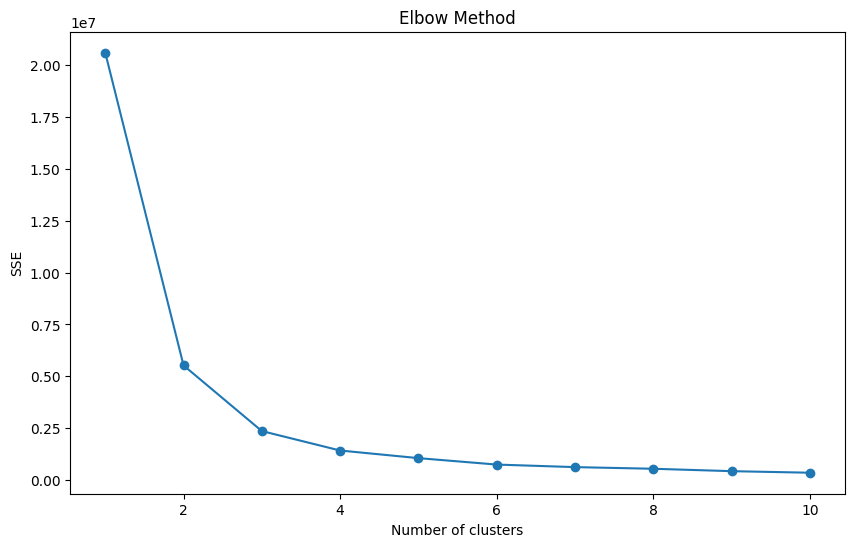

In [148]:
from sklearn.cluster import KMeans

# determine no of clusters by elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x2)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')

In [155]:
km = KMeans(n_clusters=10, random_state=0)
km.fit(x2, y2)

KMeans(n_clusters=10, random_state=0)

In [156]:
km.score(x_test, y_test)

-68822.4630437609

In [157]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [158]:
xgb.score(x_test, y_test)

0.5285439384220654

In [160]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [161]:
logreg.score(x_test, y_test)

0.2591404746632457

In [162]:
bagging_model = BaggingClassifier(LogisticRegression(max_iter=10000))
bagging_model.fit(x_train, y_train)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (st

BaggingClassifier(estimator=LogisticRegression(max_iter=10000))

In [163]:
bagging_model.score(x_test, y_test)

0.25465041693393203